# 007. Explaining the magic of convolutional neural network (CNN)

A standard neural network is tied to its input, and if the input is a pixel matrix, it
recognizes shapes and features based on their position on the matrix. CNNs can
elaborate images better than a standard neural network because:

- The network specializes particular neurons to recognize certain shapes
(thanks to convolutions), so that same capability to recognize a shape doesn’t
need to appear in different parts of the network.

- By sampling parts of an image into a single value (a task called pooling), you
don’t need to strictly tie shapes to a certain position (which would make
rotating them impossible). The neural network can recognize the shape in
every rotation or distortion, thus assuring a high capacity of generalization
of the convolutional network.

An example uses the [fashion mnist](https://github.com/zalandoresearch/fashion-mnist), a dataset of clothing articles from Zalando, an online fashion
retailer. The dataset comprises 60,000 training and 10,000 test examples. Each
example is a 28-x-28 pixel image representing an article from ten groups of
clothing apparel.

https://habr.com/ru/post/348000/

**Топология сверточной нейросети**

Определение топологии сети ориентируется на решаемую задачу, данные из научных статей и собственный экспериментальный опыт.

Можно выделить следующие этапы влияющие на выбор топологии:

- определить решаемую задачу нейросетью (классификация, прогнозирование, модификация);
- определить ограничения в решаемой задаче (скорость, точность ответа);
- определить входные (тип: изображение, звук, размер: 100x100, 30x30, формат: RGB, в градациях серого) и выходных данные (количество классов).

In [7]:
import pandas as pd
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None 

2022-11-21 05:10:50.491358: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


4422102/4422102 [==============================] - 4s 1us/step


<Figure size 432x288 with 0 Axes>

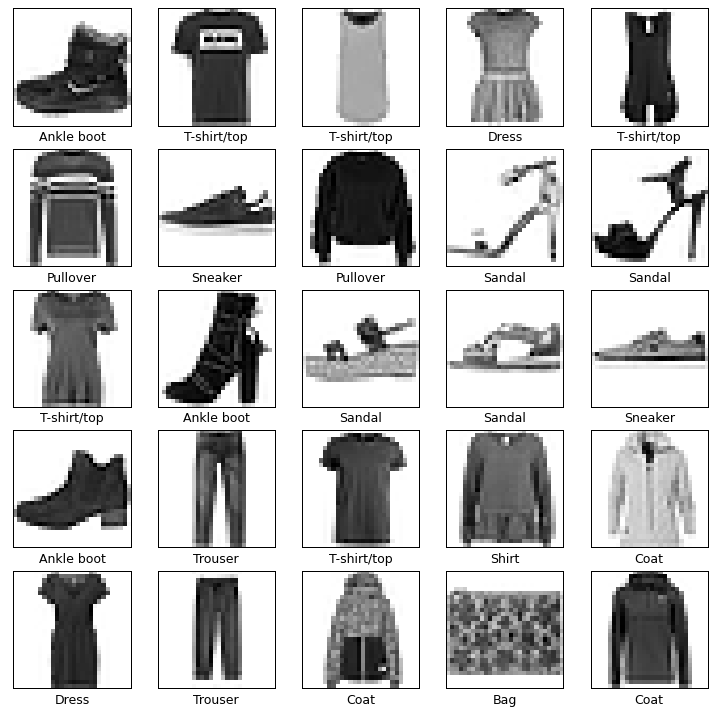

In [2]:
import tensorflow.keras as keras

loader = keras.datasets.fashion_mnist.load_data

(x_train, y_train), (x_test, y_test) = loader()

import matplotlib.pyplot as plt

class_names = {0: 'T-shirt/top', 1: 'Trouser',
        2: 'Pullover', 
               3: 'Dress', 
               4: 'Coat',
        5: 'Sandal', 6: 'Shirt', 7: 'Sneaker',
        8: 'Bag', 9: 'Ankle boot'}
plt.figure()

fig, ax = plt.subplots(5, 5, figsize=(10, 10), dpi=90)

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[y_train[i]])
plt.show();

After loading the dataset and plotting some examples, the code divides the pixel
values in the images by 255 so that the values of pixels will now range from 0 to 1.
The code then reshapes the image format so that it has one color channel.

Images usually have a 3D matrix form, whose third dimension is a color channel.
(Usually there is one channel each for red, green, and blue in the RGB format).
CNNs expect to receive images in 3D matrix format, so you have to reshape the 2D
image matrixes.

In [4]:
num_classes = 10
x_train = (x_train / 255.).reshape(-1, 28, 28, 1)
x_test = (x_test / 255.).reshape(-1, 28, 28, 1)

After preparing the data, the code instantiates the model, which contains two layers
of convolutions (one with 32 and another with 64 filters) that will analyze the
images using a 3-x-3-pixel kernel. The expectation is that the large number of
filters and the small kernel will pick up many image details. Next, the code uses a
max pooling layer to reduce the size of the resulting input by half before passing
everything to a few dense layers.

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=32,
kernel_size=(3, 3),
activation='relu'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(num_classes,
activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         


2022-11-21 05:13:38.176573: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 32)                294944    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 314,090
Trainable params: 314,090
Non-trainable params: 0
_________________________________________________________________


**We can see the organization of the model from the above output.**

In [6]:
model.fit(x_train, y_train, batch_size=64, epochs=11, verbose=1,
validation_split=0.2)

score = model.evaluate(x_test, y_test, verbose=0)

print(f'Accuracy on test set: {score[1]:0.3}')

Epoch 1/11
750/750 [==============================] - 84s 111ms/step - loss: 0.5376 - acc: 0.8110 - val_loss: 0.3308 - val_acc: 0.8808
Epoch 2/11
750/750 [==============================] - 77s 102ms/step - loss: 0.3424 - acc: 0.8773 - val_loss: 0.2749 - val_acc: 0.8993
Epoch 3/11
750/750 [==============================] - 77s 102ms/step - loss: 0.2865 - acc: 0.8964 - val_loss: 0.2462 - val_acc: 0.9088
Epoch 4/11
750/750 [==============================] - 70s 93ms/step - loss: 0.2514 - acc: 0.9075 - val_loss: 0.2386 - val_acc: 0.9137
Epoch 5/11
750/750 [==============================] - 323s 431ms/step - loss: 0.2234 - acc: 0.9180 - val_loss: 0.2408 - val_acc: 0.9107
Epoch 6/11
750/750 [==============================] - 92s 123ms/step - loss: 0.1967 - acc: 0.9284 - val_loss: 0.2295 - val_acc: 0.9174
Epoch 7/11
750/750 [==============================] - 88s 117ms/step - loss: 0.1772 - acc: 0.9348 - val_loss: 0.2227 - val_acc: 0.9208
Epoch 8/11
750/750 [==============================] - 9

The code reserved 20 percent of the examples for validation purposes during the training, which
allows verification that the validation loss and measures never deteriorate (a sign
of overfitting). The code also compares the validation loss with the training loss (a
large difference between training and validation loss is another, more subtle, sign
of overfitting).

The process should complete with a training accuracy of about 95 percent, a validation
accuracy of about 92 percent, and a test accuracy of 91.5 percent (you only
see the test accuracy in the printed output, which can vary somewhat from
91.5 percent). Because the differences between training, validation, and test are
small, you have confirmation that the model, thanks to the implemented and
trained convolution layers, is able to correctly guess nine examples out of ten in
the fashion mnist.

***Thank you for going through this project. Your comments are more then welcome to ybezginova2021@gmail.com***

***Best wishes,***

***Yulia***